
# Introduction

Le machine learning consiste à faire ingérer des données par un ordinateur à travers des calculs statistiques pour identifier des schémas récurrents.

Cette ingestion peut-être supervisée, on donne à l'ordinateur la cible à atteindre ; ou non supervisée, l'ordinateur étudiera les caractéristiques des différentes données et proposera des cibles de réponse.

Il existe 2 grands types d'algorythmes en machine learning :
**La classification**, dont l'objectif est de prédire l'appartenance à une catégorie.
**La regression**, dont l'obectif est de déterminer une loi mathématique à partir d'une tendance, c'est la corrélation.

Dans ce notebook, nous allons découvrir les 2 grands types d'algorithmes pour un cas d'usage RH. Ce dernier ayant une finalité pédagogique, il est délibérément grossier.

# Description du cas

Vous êtes People Analyst de la société Michu, qui fabrique des casseroles dans le Jura.
Votre campagne d'entretien annuelle est terminée. De chacun des managers vous avez obtenu :

- Les évaluations sur les soft skills, les hard skills, et la performance globale,
- La distribution d'une prime de 2000€ pour performance exceptionnelle à la discrétion du manager,
- La répartition des augmentations individuelles sur l'année.

Bien entendu, il vous faut vérifier que les données sont cohérentes.

Nous allons donc commencer par explorer les données.

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

data ="https://raw.githubusercontent.com/ArnaudCoulon/MyPeopleAnalytics.fr/main/Analytics/introduction_ML/Database_intro_ML.csv"

df = pd.read_csv(data)

In [2]:
print(df.shape)
print()
print(df.dtypes)

(500, 8)

Matricule                   object
Emploi                      object
Performance globale        float64
Performance hard skills      int64
Performance soft skills      int64
Rémunération               float64
Prime 2000€                  int64
Augmentation               float64
dtype: object


In [3]:
df.head()

,Matricule,Emploi,Performance globale,Performance hard skills,Performance soft skills,Rémunération,Prime 2000€,Augmentation
0,A001,Administratif,2.0,3,1,1964.872127,0,2.016283
1,A002,Administratif,5.0,5,5,2149.034296,1,5.468552
2,A003,Administratif,2.5,2,3,1986.824596,0,2.612227
3,A004,Administratif,4.0,5,3,2071.828183,0,5.146593
4,A005,Administratif,2.0,1,3,1964.872127,0,2.833823


In [4]:
# Affichage des statistiques descriptives
# La prime étant une donnée catégorielle, ces données ne sont pas exploitables.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Performance globale,500.0,2.556500,1.293650,0.0,1.500000,2.500000,3.500000,5.000000
Performance hard skills,500.0,2.490000,1.768659,0.0,1.000000,3.000000,4.000000,5.000000
Performance soft skills,500.0,2.602000,1.695094,0.0,1.000000,3.000000,4.000000,5.000000
Rémunération,500.0,2955.150503,1386.633661,1900.0,2011.700002,2378.443523,3098.903106,7294.490050
Prime 2000€,500.0,0.112000,0.315682,0.0,0.000000,0.000000,0.000000,1.000000
Augmentation,500.0,2.647325,2.005220,0.0,0.000000,3.041748,4.040799,6.746705


# Classification

Découvrons comment le machine learning nous permet de comprendre la composition d'un groupe et d'en prédire l'appartenance.

In [5]:
# Grouper les salariés bénéficiant de la prime
df_group_prime = df.groupby('Prime 2000€')

# Affichage du nombre de salariés qui bénéficient de la prime.
print(df_group_prime.size())

Prime 2000€
0    444
1     56
dtype: int64


In [6]:
table = pd.pivot_table(data=df,index=['Emploi', "Prime 2000€"])
table

# On constate que la règle a été respectée, les salariés bénéficiant de la prime (1) présentent bien des performances supérieures à ceux n'en bénéficiant pas (0).

Augmentation  ...  Rémunération
Emploi        Prime 2000€                ...              
Administratif 0                2.577932  ...   1985.801602
              1                5.497882  ...   2119.505216
Commerciaux   0                2.091262  ...   4394.219820
              1                5.486956  ...   7294.490050
Technicien    0                2.120700  ...   2475.282818
              1                5.399725  ...   2830.762931

[6 rows x 5 columns]

In [7]:
table = pd.pivot_table(data=df,index=['Emploi', "Prime 2000€"],aggfunc=np.median)
table

# C'est aussi le cas lorsque l'on observe la mediane.

Augmentation  ...  Rémunération
Emploi        Prime 2000€                ...              
Administratif 0                2.985768  ...   1986.824596
              1                5.468552  ...   2108.021685
Commerciaux   0                2.712384  ...   3947.734041
              1                5.475261  ...   7294.490050
Technicien    0                2.746174  ...   2458.324874
              1                5.098473  ...   2831.841244

[6 rows x 5 columns]

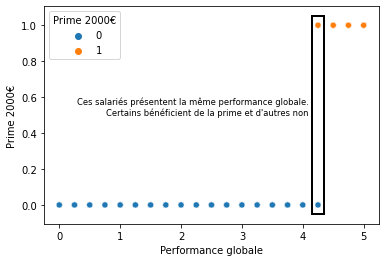

In [55]:
sns.scatterplot(y = "Prime 2000€", x="Performance globale",data =df, hue ="Prime 2000€")

plt.text(4.1, 0.5, "Ces salariés présentent la même performance globale.\nCertains bénéficient de la prime et d'autres non", horizontalalignment='right', size='small', color='black')

left, bottom, width, height = (4.15, -0.05, 0.2, 1.1)
rect=mpatches.Rectangle((left,bottom),width,height, fill=False, color="black", linewidth=2)
plt.gca().add_patch(rect)

plt.show()

# Mais lorsque l'on regarde la distribution, il semble que l'information seule de la performance globale ne suffise pas à distribuer la prime.
# En effet, des point de performance globale sont en commun.
# Le machine learning présente tout son intérêt ici.

## Péripétie

Un manager n'arrive pas à se décider dans l'attrbution de la prime de 2 000€. Il vous est demandé donner de la visibilité sur le montant qui sera distribué.

Pour cela, nous pouvons nous appuyer sur les décisions prises par les autres managers et conclure d'un comportement similaire.

Nous utiliserons la seule règle donnée pour la distribution de la prime : *récompenser une performance excpetionnelle*.


Il est important d'avoir en tête que les machines ne sont pas à l'aise avec les données catégorielles comme les emplois. Nous appliquer appliquer un *One Hot Encoding*. Le principe est de créerune colonne par catégories. Ces données seront ainsi plus intelligibles pour une machine.

In [56]:
one_hot = pd.get_dummies(df["Emploi"], prefix = "Emploi")

print(one_hot)

     Emploi_Administratif  Emploi_Commerciaux  Emploi_Technicien
0                       1                   0                  0
1                       1                   0                  0
2                       1                   0                  0
3                       1                   0                  0
4                       1                   0                  0
..                    ...                 ...                ...
495                     0                   1                  0
496                     0                   1                  0
497                     0                   1                  0
498                     0                   1                  0
499                     0                   1                  0

[500 rows x 3 columns]


In [57]:
# Ajoutons ces données encodées à notre jeu de données.

df = df.join(one_hot)

df.head()

,Matricule,Emploi,Performance globale,Performance hard skills,Performance soft skills,Rémunération,Prime 2000€,Augmentation,Emploi_Administratif,Emploi_Commerciaux,Emploi_Technicien
0,A001,Administratif,2.0,3,1,1964.872127,0,2.016283,1,0,0
1,A002,Administratif,5.0,5,5,2149.034296,1,5.468552,1,0,0
2,A003,Administratif,2.5,2,3,1986.824596,0,2.612227,1,0,0
3,A004,Administratif,4.0,5,3,2071.828183,0,5.146593,1,0,0
4,A005,Administratif,2.0,1,3,1964.872127,0,2.833823,1,0,0


## Constitution des bases de test et d'entrainement

Afin de constituer notre modèle, nous allons séparer nos données  en deux bases: 
- Une base d'apprentissage pour 80% des données disponibles. Cette base servira à entrainter l'ordinateur
- Une base de test pour les 20% des données restantes. Cette base servira à confronter les résultats de l'entrainement avec les données

Pour faire simple, nous utiliserons une méthode de sélection aléatoire.


In [58]:
df_train = df.sample(frac = 0.8)

df_test=df.drop(df_train.index)

print(df_train.shape)
print(df_test.shape)

(400, 11)
(100, 11)


In [59]:
df.columns

Index(['Matricule', 'Emploi', 'Performance globale', 'Performance hard skills',
       'Performance soft skills', 'Rémunération', 'Prime 2000€',
       'Augmentation', 'Emploi_Administratif', 'Emploi_Commerciaux',
       'Emploi_Technicien'],
      dtype='object')

In [60]:
# Nous définissons Y, la variable catégorielle que nous souhaitons prédire. Ici, il s'agit de l'attribution de la prime.
y = df_train["Prime 2000€"]

# Et nous définissons X, les variables permettant d'expliquer la variable Y.
# L'apport du People Analytics par rapport à un Data scientist est structurant. 
# En effet, sur des questions complexes, une expertise métier est essentielle afin de construire et d'affiner le modèle.
# Nous pouvons par exemple exclure les matricules. 
# Nous décidons également de retirer la rémunération puisque cette prime ne doit être attibuée qu'à la performance.
# Nous conservons les emplois car la performance, en tant que manifestation d'une compétence, peut se manifester différement selon les emplois.
variables_test =['Performance globale','Performance hard skills','Performance soft skills','Emploi_Administratif','Emploi_Commerciaux','Emploi_Technicien']
X = df_train[variables_test]

## Construction du modèle de Machine Learning

Nous pouvons maintenant appeler Scikit Learn, la bibliothèque spécialisée dans le machine learning afin de lui poser notre question.

Nous allons utiliser un arbre de décision. Il s'agit d'une méthode simple mais puissante.
Il s'agit de créer une  branches pour chaque variable explicative et va tester poids de cette variable dans l'attribution à une catégorie.

In [61]:
# import du model tree de scikit-learn
from sklearn import tree

# création du modèle d'apprentissage
clf= tree.DecisionTreeClassifier()

# Envoi des données d'apprentissage pour entrainement
clf = clf.fit(X,y)

"\nLes données importantes sont :\n- Le chemin que prend la machine pour traiter les questions. \n- Le coefficient de Gini, qui permet de mesurer l'égalité de notre échantillon sur la variable. Plus cet indice est petit, pour les classes sont concentrées sur un sommet\n"

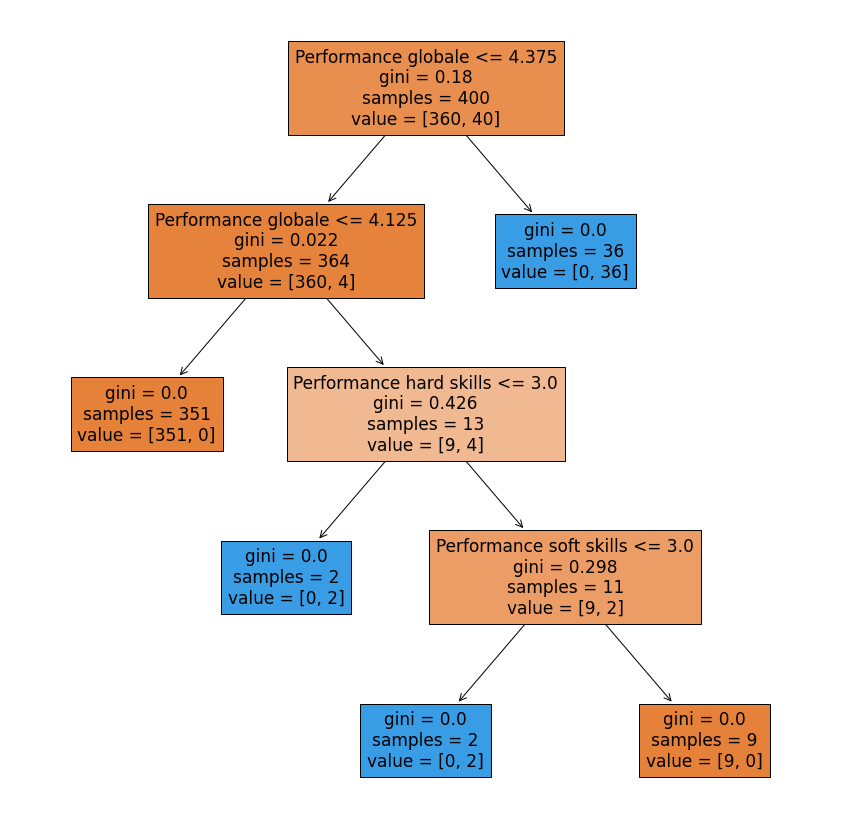

In [70]:
# Une fois l'entrainement réalisé, il est possible d'afficher l'arbre de décision.
# En bleu, se trouvent les chemins qui permettent de constater l'attribution d'une prime. 
# On y retrouve le nombre d'observations qui respectent ce critère.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X_col = X.columns
plt.figure(figsize = (15,15))
plot_tree(clf,feature_names= X_col, filled = True)

"""
Les données importantes sont :
- Le chemin que prend la machine pour traiter les questions. 
- Le coefficient de Gini, qui permet de mesurer l'égalité de notre échantillon sur la variable. Plus cet indice est petit, pour les classes sont concentrées sur un sommet
"""

In [63]:
#On constate que la performance globale est la variable la plus importante suivie des autres sources de performance et des types d'emploi.
impVarFirst={"Variable":X_col,"Importance":clf.feature_importances_}
print(pd.DataFrame(impVarFirst))

                  Variable  Importance
0      Performance globale    0.923077
1  Performance hard skills    0.031469
2  Performance soft skills    0.045455
3     Emploi_Administratif    0.000000
4       Emploi_Commerciaux    0.000000
5        Emploi_Technicien    0.000000


## Test du modèle

Notre modèle étant construit, nous pouvons maintenant passer au test sur l'échantillon restant en passant les mêmes données que pour l'apprentissage.

In [64]:
# Selection des donner à tester
X_test = df_test[variables_test]

# Lancement du test
prediction = pd.DataFrame(clf.predict(X_test))
prediction.columns= ["Prime prediction"]

# Affichage du test
prediction.groupby("Prime prediction").size()

Prime prediction
0    84
1    16
dtype: int64

Nous constatons que la sortie de la prédiction est similaire à l'entrée : 1 lorsqu'une prime est attribuée, 0 lorsqu'aucune prime n'est attribuée.

Ainsi, 1 salarié sur les 50 de notre test voient l'attribution de la prime.

L'attribution était de 8% sur notre jeu de données d'entraiement.
Vérifions la qualité de notre prédiction.

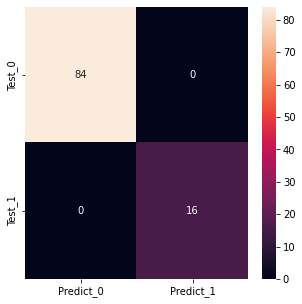

In [65]:
from sklearn import metrics
cm = metrics.confusion_matrix(df_test["Prime 2000€"],prediction)
df_cm = pd.DataFrame(cm, index =["Test_0","Test_1"], columns=["Predict_0","Predict_1"])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm, annot = True)

##Conclusions du test

La matrice de confusion nous montre que notre modèle a prédit correction :
(16+84)/100 = 100% des données.

Bien entendu, le jeu de données est contitué de telle sorte que le cas fonctionne. En réalité, le travail de préparation et d'exploration de données est bien plus long.
De même, nous n'avons réalisé aucun ajustement des paramètres de notre algorithmes.

Nous en concluons que les modèles de machine learning permettent de simplifier et de donner une approximation d'une réalité à partir d'observations. Pour des décisions si critiques, une intelligence humaine doit rester au service de l'humain et ne pas s'y substituer.

Nous pourrions améliorer notre modèle en :
- Optimisant notre modèle d'apprentissage (affinage des paramètres d'apprentissage, des ratios apprentissage/test)
- Utilisant plus de variables (ancienneté, âge, lieu d'emploi)
- Utilisant un jeu de données d'entrainement plus important (des filiales, des opérations similaires sur des années précédantes)


En pleine connaissance des approximations de notre modèle, nous pouvons appliquer une prédiction.

In [66]:
# Nous téléchargeons les données incomplètes à prédire

data_to_predict = "https://raw.githubusercontent.com/ArnaudCoulon/MyPeopleAnalytics.fr/main/Analytics/introduction_ML/DataSet_introduction_ML_Echantillon.csv"

df_to_predict = pd.read_csv(data_to_predict)

one_hot_predict = pd.get_dummies(df_to_predict["Emploi"], prefix = "Emploi")

df_to_predict = df_to_predict.join(one_hot_predict)

X_predict = df_to_predict[variables_test]


df_to_predict

,Matricule,Emploi,Performance globale,Performance hard skills,Performance soft skills,Emploi_Administratif,Emploi_Commerciaux,Emploi_Technicien
0,D001,Administratif,3,3,2,1,0,0
1,D002,Administratif,3,1,5,1,0,0
2,D003,Administratif,1,1,1,1,0,0
3,D004,Administratif,5,5,0,1,0,0
4,D005,Administratif,3,4,2,1,0,0
5,D006,Technicien,3,3,4,0,0,1
6,D007,Technicien,2,2,0,0,0,1
7,D008,Technicien,5,5,5,0,0,1
8,D009,Technicien,1,0,5,0,0,1
9,D010,Technicien,3,5,2,0,0,1


In [67]:
# Lancement du test
prediction_prod = pd.DataFrame(clf.predict(X_predict))
prediction_prod.columns= ["Prime prediction"]

print(prediction_prod)

# Affichage du test
prediction_prod.groupby("Prime prediction").size()

    Prime prediction
0                  0
1                  0
2                  0
3                  1
4                  0
5                  0
6                  0
7                  1
8                  0
9                  0
10                 1
11                 0
12                 0
13                 0
14                 0


Prime prediction
0    12
1     3
dtype: int64

#Régression linéaire
Découvrons comment le machine learning nous permet de comprendre la composition d'une variable quantitative et d'en prédire la valeur.

Dans cette partie, nous allons tâcher de comprendre les liens qui peuvent exister en la performance globale et l'augmentation proposée.

Commençons par dresser un graphique avec les deux données qui nous intéressent.
Nous remarquons qu'il semble y avoir un lien entre les deux données.
Nous pouvons traçer la courbe de ce lien en calculant l'ordonnées à l'origine et le coefficient de progression de la courbe.
Mais c'est chronophage et imprécis de le faire manuellement.

Ca tombe bien, c'est exactement le principe de la régression linéaire. La machine calcul l'espacement des différents points et dresse une courbe de tendance.
Il est ensuite possible de positionner des points sur cette courbe pour prédire des valeurs.
Par exemple, il est possible de prédire le montant d'augmentation.


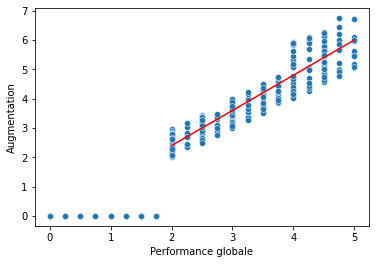

In [69]:
#Affichage d'un graphique performance globale / Augmentation individuelle
sns.scatterplot(x="Performance globale",y="Augmentation", data = df)
x_plot = np.linspace(2,5,100)
y_plot = x_plot*1.2
plt.plot(x_plot, y_plot , color='r')

##Construction du modèle de Machine Learning

In [128]:
# Défintion des valeurs cibles et valeurs explicatives.
# Nous utilisons l'ensemble de notre population pour la regression.
# En effet, la méthode de vérification du test n'implique pas de comparaison entre deux échantillons comme pour la classification.

#variables_test_reg = ['Performance globale','Performance hard skills','Performance soft skills']

y_reg = df["Augmentation"].values.reshape(-1, 1)
X_reg = df["Performance globale"].values.reshape(-1, 1)

In [129]:
# Import de la bibliothèque Scikit Learn permettant de faire des regression linéaires.
from sklearn import linear_model

reg = linear_model.LinearRegression()

# Exécution de l'entrainement de la regression linéaire
reg.fit(X_reg,y_reg)

# Affichage du R2, le score de la régression linéaire
print(reg.score(X_reg,y_reg))

0.890510998237858


## Interprétation
Le score de la régression linéaire (R2) est de près de 90%.
Plus ce score est élevé, plus la régression linéaire est performante.

Ainsi, notre modèle permet d'expliquer 90% des données qui lui ont été présentées. Sur 500 individus, il s'agit de 450.
Compte tenu de la simplicité du modèle, ce score est très bon.

Notre objectif était d'identifier la courbe permettant d'expliquer le lien entre performance individuelle et taux d'augmentation. Nous allons maintenant obtenir les caractéristiques de cette courbe.

Les coefficients sont dans l'ordre de saisie.

Ainsi la formule mathématique de notre modèle est :

Taux d'augmentation = -1,05 + 1,57 * Performance Globale - 0,06 * Performance hard skills -  0,06 * Performance soft skills

Nous pouvons appliquer cette formule pour réaliser des prédictions sur les salariés de notre manager tête en l'air.

In [130]:
# Affichage des coefficients de la courbe
print(reg.coef_)

#affichage de l'ordonnée à l'origine
print(reg.intercept_)

[[1.46273244]]
[-1.09215051]


In [133]:
X_predict_reg = df_to_predict["Performance globale"].values.reshape(-1, 1)
y_reg_predict = reg.predict(X_predict_reg)

print(y_reg_predict)

[[3.29604681]
 [3.29604681]
 [0.37058193]
 [6.22151169]
 [3.29604681]
 [3.29604681]
 [1.83331437]
 [6.22151169]
 [0.37058193]
 [3.29604681]
 [6.22151169]
 [1.83331437]
 [4.75877925]
 [3.29604681]
 [0.37058193]]


##Représentation de la prédiction

Affichons la courbe que nous souhaitions prédire.

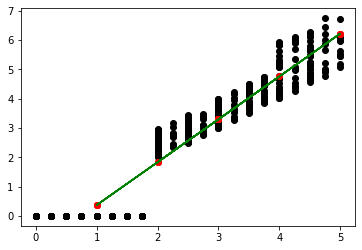

In [138]:
X_reg = df["Performance globale"]

plt.scatter(X_reg, y_reg, color="black")
plt.scatter(X_predict_reg, y_reg_predict, color="red")
plt.plot(X_predict_reg, y_reg_predict, color ='green')
  

plt.show()

##Conclusions du test

La régression linéaire permet de formuler une règle mathématique représentant la correlation entre plusieurs variables.

Ici, notre test est concluant à 90%.
Nous constatons en particulier que, puisqu'il s'agit d'une fonction linéaire, il y a un risque d'imprécision sur les performance globale inférieur à deux.
Nous aurions pu retirer ces observations pour neutraliser leur effet dans notre modèle.
Nous aurions pu utiliser d'autres modèles de régression permettant de tenir comptes de ces approximations.